In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction. text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [2]:
import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to C:\Users\Shreyas
[nltk_data]     Desai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#To preview the data
#print(data.head())
data = pd.read_csv("C:/Users/Shreyas Desai/Documents/Hate Speech Detection/data.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1348667309.py, line 3)

In [ ]:
data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
print(data.head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [ ]:
def clean (text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data.head())


                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [ ]:
x = np.array(data["tweet"]) #feature
y = np.array(data["labels"]) #target
cv = CountVectorizer()
X = cv.fit_transform(x)
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Model building
model = DecisionTreeClassifier()
#Training the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy   : 0.8762684924807433
Precision Score :  0.8762684924807433
Recall Score :  0.8762684924807433
f1 score :  0.8762684924807433


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


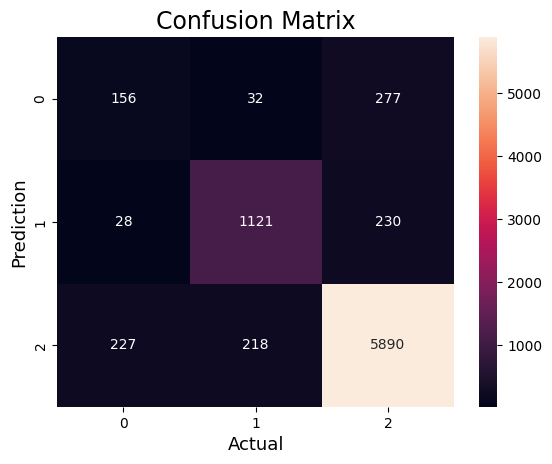

In [ ]:
#Testing the model
y_pred = model.predict (X_test)
y_pred#Accuracy Score of our model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive', average='micro'))
print("f1 score : ",f1_score(y_test, y_pred,pos_label='positive', average='micro'))


cm = confusion_matrix(y_test,y_pred)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




In [ ]:
#Predicting the outcome
inp = "you are my inspiration"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['No Hate and Offensive Speech']


In [ ]:
#Predicting the outcome
inp = "i will kill you"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Hate Speech']


In [ ]:
#Predicting the outcome
inp = "shishir is gay as fuck"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']
